In [125]:
import whisper
import librosa 
import matplotlib.pyplot as plt 
from IPython.display import Audio
import numpy as np 
from typing import Dict, Union

## ignore UserWarning
import warnings
warnings.filterwarnings('ignore')

In [126]:
## location of the audio file
AVAILABLE_AUDIOS = dict(
kaiser = "sample_data/Kaiser_FMS_minuto_pres.mp3",
papo = "sample_data/Papo_FMS_Vegano.mp3",
tom_segura = "sample_data/Tom_Segura_english.mp3"
)

In [127]:


class AudioTranscriber: 
    def __init__(self, model_name: str, audio_file_path: str):
        self.model = self.load_model(model_name)
        self.audio_file = audio_file_path
        self.loaded_audio = self.load_audio(audio_file_path)
        self.whisper_mel_spec = None

    @staticmethod
    def load_model(model_name: str) -> whisper.Whisper:
        """Loads the model"""
        return whisper.load_model(model_name)
    @staticmethod
    def load_audio(audio_file: str) -> np.ndarray:
        """Loads the audio file into the whisper model"""
        return whisper.load_audio(audio_file)


    def plot_melspec(self) -> None: 
        """Plots the log-mel-spectrogram"""
        ## load the audio file
        y, sr = librosa.load(self.audio_file)

        ## extract the mel spectrogram
        mel_spec= librosa.feature.melspectrogram(y=y, sr=sr)

        ## plot the mel spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.tight_layout()
        plt.show()

    ## the output of the following function is a dictionary with a dictionary[str, float], np.ndarray and a string 
    def mel_spec_audio_detection(self) -> Dict[str, Union[Dict[str, float], np.ndarray, str]]:
        """Takes in the loaded audio file and returns the language and the mel spectrogram"""
        ## padding/trimming for the decoder 
        padded_trimmed_audio = whisper.pad_or_trim(self.loaded_audio)
        
        ## extract the log-mel-spec 
        mel_spec = whisper.log_mel_spectrogram(padded_trimmed_audio)
        self.whisper_mel_spec = mel_spec
        ## detect the language
        _, probs = self.model.detect_language(mel_spec)
        ## detected language 
        det_lang = max(probs, key=probs.get)

        return {"language": det_lang, "mel_spec": mel_spec, "probs": probs}

    def transcribe_audio(self, options: whisper.DecodingOptions) -> str:
        """Transcribes the audio file"""
        ## decode the audio
        return whisper.decode(self.model, self.whisper_mel_spec, options).__dict__

    def transcribe_audio_no_trim(self) -> dict:
        """Transcribes the audio without padding or trimming"""
        return self.model.transcribe(self.audio_file)


In [133]:
MODEL_NAME = 'base'
AUDIO = AVAILABLE_AUDIOS['kaiser']

Audio(AUDIO)

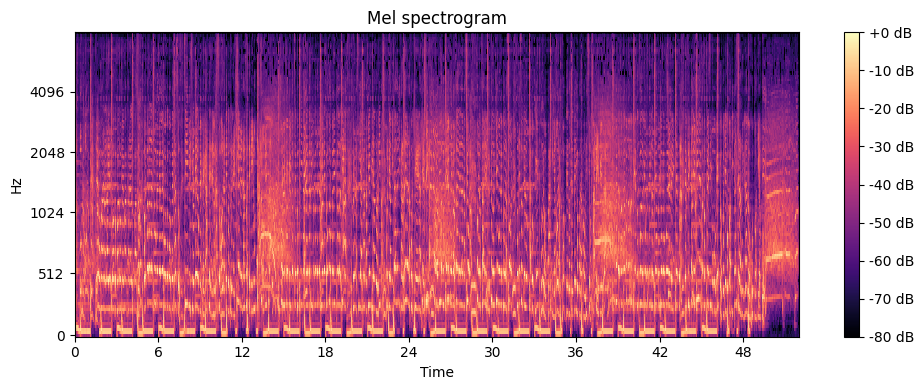

The detected language is es
Transcription with padding and trimming
¡Pero uno, uno, ple! Yo van a la aire todo cuando me machan el paso Voy para la lube, me levo como pegazo Si misionero me pegaste en el brazo Ahora tengo a tu energía y me lanzo este minuta ¡Sommy, por favor! Por mi focchil, yo se combina Para no garrisa cuando ya viene Cuando me rica la dina Yo nací a cada bien tirando rima Porque la mitad de mi carrera La forje en aljecida Porque al dino de usted Bueno, saire la nación


Transcription without padding and trimming
¡Pero uno, uno, ple! Yo van a la aire todo cuando me machan el paso Voy para la lube, me levo como pegazo Si misionero me pegaste en el brazo Ahora tengo a tu energía y me lanzo este minuta ¡Sommy, por favor! Por mi focchil, yo se combina Para no garrisa cuando ya viene Cuando me rica la dina Yo nací a cada bien tirando rima Porque la mitad de mi carrera La forje en aljecida Porque al dino de usted Bueno, saire la nación Bueno, saire, yo lo llevo en el coraz

In [134]:
## isntantiate the class
transcriber = AudioTranscriber(MODEL_NAME, AUDIO)

## plot the mel spectrogram
transcriber.plot_melspec()

## get the language and the mel spectrogram
det_lang = transcriber.mel_spec_audio_detection()

print(f"The detected language is {det_lang['language']}")

## transcribe the audio
options = whisper.DecodingOptions(fp16=False if transcriber.model.device.type == 'cpu' else True)

## transcribe the audio
transcription_trim = transcriber.transcribe_audio(options)['text']

## print the transcription
print("Transcription with padding and trimming")
print(transcription_trim.strip())
print("\n")
## transcribe the audio without padding or trimming
print("Transcription without padding and trimming")
transcription_no_trim = transcriber.transcribe_audio_no_trim()['text']
print(transcription_no_trim.strip())
print("\n")

In [85]:


def load_model(model_name: str) -> whisper.Whisper:
    """Loads the model"""
    return whisper.load_model(model_name)

def load_audio(audio_file: str) -> np.ndarray:
    """Loads the audio file into the whisper model"""
    return whisper.load_audio(audio_file)


def plot_melspec(audio_file: str) -> None: 
    """Plots the log-mel-spectrogram"""
    ## load the audio file
    y, sr = librosa.load(audio_file)

    ## extract the mel spectrogram
    mel_spec= librosa.feature.melspectrogram(y=y, sr=sr)

    ## plot the mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()

## the output of the following function is a dictionary with a dictionary[str, float], np.ndarray and a string 
## Tuple[Dict[str, float], np.ndarray, str]
def mel_spec_audio_detection(model, audio_file: np.ndarray) -> Dict[str, Union[Dict[str, float], np.ndarray, str]]:
    """Takes in the loaded audio file and returns the language and the mel spectrogram"""
    ## padding/trimming for the decoder 
    padded_trimmed_audio = whisper.pad_or_trim(audio_file)
    
    ## extract the log-mel-spec 
    mel_spec = whisper.log_mel_spectrogram(padded_trimmed_audio)

    ## detect the language
    _, probs = model.detect_language(mel_spec)
    ## detected language 
    det_lang = max(probs, key=probs.get)

    return {"language": det_lang, "mel_spec": mel_spec, "probs": probs}

def transcribe_audio(model: whisper.Whisper, mel_spec: np.ndarray, options: whisper.DecodingOptions) -> str:
    """Transcribes the audio file"""
    ## decode the audio
    return whisper.decode(model, mel_spec, options).__dict__

def transcribe_audio_no_trim(model: whisper.Whisper, audio_file: str) -> dict:
    """Transcribes the audio without padding or trimming"""
    return model.transcribe(audio_file)


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


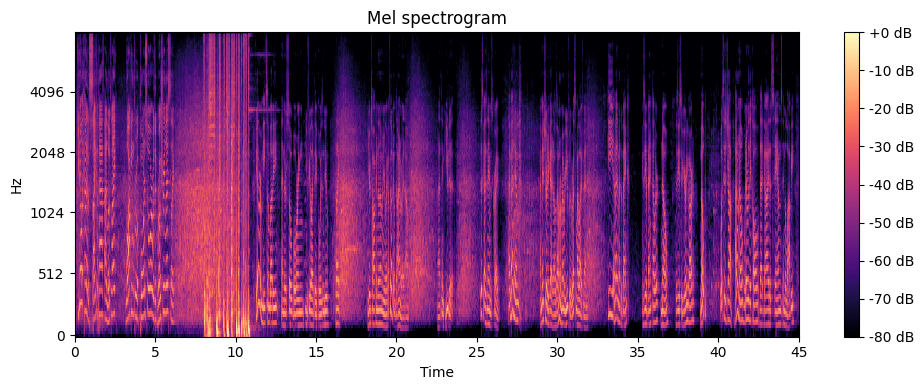

/Users/eric/.local/share/virtualenvs/Transcribe-u9F-qWh1/lib/python3.10/site-packages/whisper/transcribe.py:79: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [86]:
AUDIO = AVAILABLE_AUDIOS["tom_segura"]

## testing 
model = load_model("base")

## load the audio file
audio_file = load_audio(AUDIO)

## get the language and the mel spectrogram
mel_spec_audio = mel_spec_audio_detection(model, audio_file)

## plot the mel spectrogram
plot_melspec(AUDIO)

## set the options 
options = whisper.DecodingOptions(fp16=False if model.device.type == "cpu" else True)

## get the transcription 
transcription = transcribe_audio(model, mel_spec_audio["mel_spec"], options)

## get the transcription without padding or trimming
transcription_no_trim = transcribe_audio_no_trim(model, AUDIO)

In [89]:
## listen to the audio 
Audio(AUDIO)

In [87]:
transcription['text']

"Do you know what kind of a psychopath I look like? Walking through a porn store with a grocery list? Like... You ever meet somebody and they're so boring you feel like they poisoned you? Like... You're talking to them and you're like, I feel like I'm dying right now. And I think you did it. This guy's name is Craig. I met him..."

In [88]:
transcription_no_trim['text']

" Do you know what kind of a psychopath I look like? Walking through a porn store with a grocery list? Like... You ever meet somebody and they're so boring you feel like they poisoned you? Like... You're talking to them and you're like, I feel like I'm dying right now. And I think you did it. This guy's name is Craig. I met him... I made sure to get it. I'm going to remember you for the rest of my life, man. He... I met him at the bank. Is he a bank teller? No. Is he a security guard? Nope. What's his job? I don't know whatever they call that guy that stands in the lobby."